<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning/03_neural_networks/deep_learning_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Deep Learning

Deep Learning is a subset of machine learning that uses multi-layered neural networks to model complex patterns in data.

In this notebook, you will:
- Understand what deep learning is
- Learn the components of a neural network
- Build your first deep neural network using TensorFlow/Keras

### **Import Required Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

sns.set(style="whitegrid")

### **Create a Toy Dataset (Non-linear)**

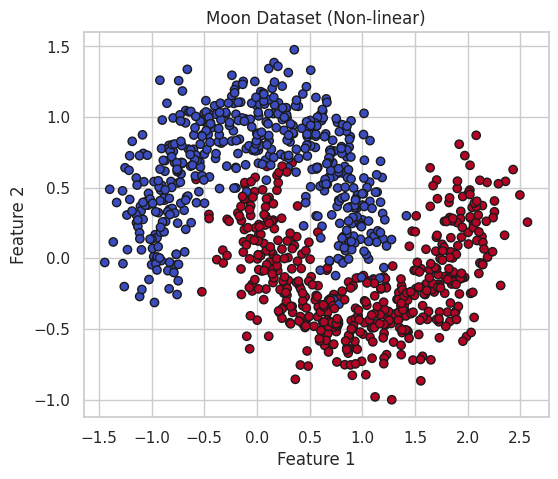

In [2]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title("Moon Dataset (Non-linear)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### **What is a Neural Network?**

A neural network consists of:
- **Input Layer**: Receives raw data
- **Hidden Layers**: Learn complex features
- **Output Layer**: Produces predictions

Each layer contains **neurons** connected via **weights**. Learning = adjusting weights using **backpropagation**.

### **Build a Deep Neural Network in Keras**

In [3]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(2,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

### **Train the Model**

In [4]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4791 - loss: 0.7061 - val_accuracy: 0.5562 - val_loss: 0.6593
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5912 - loss: 0.6567 - val_accuracy: 0.8250 - val_loss: 0.6282
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8437 - loss: 0.6265 - val_accuracy: 0.8375 - val_loss: 0.5941
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8350 - loss: 0.5959 - val_accuracy: 0.8375 - val_loss: 0.5549
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8557 - loss: 0.5490 - val_accuracy: 0.8375 - val_loss: 0.5073
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8406 - loss: 0.5051 - val_accuracy: 0.8438 - val_loss: 0.4602
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8679 - loss: 0.4540 - val_accuracy: 0.8438 - val_loss: 0.4177
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8500 - loss: 0.4160 - val_accuracy: 0.8562 - val_loss

### **Plot Training History**

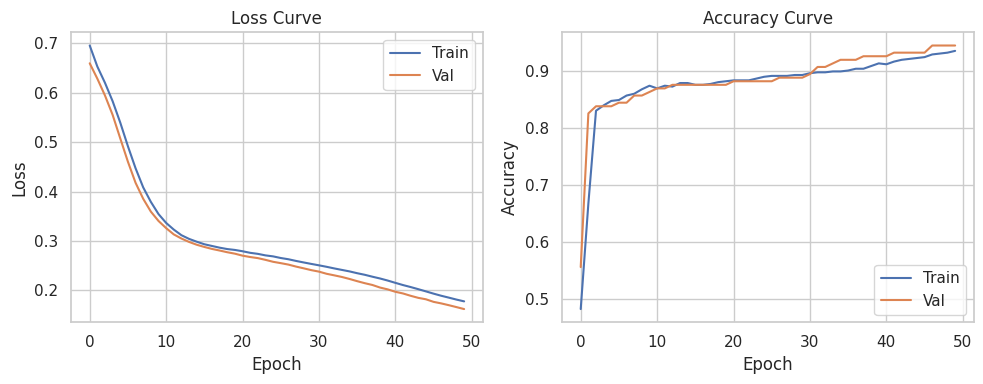

In [5]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

### **Evaluate the Model**

In [8]:
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred_labels))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       100
           1       0.96      0.90      0.93       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



### **Decision Boundary Plot (Bonus)**

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


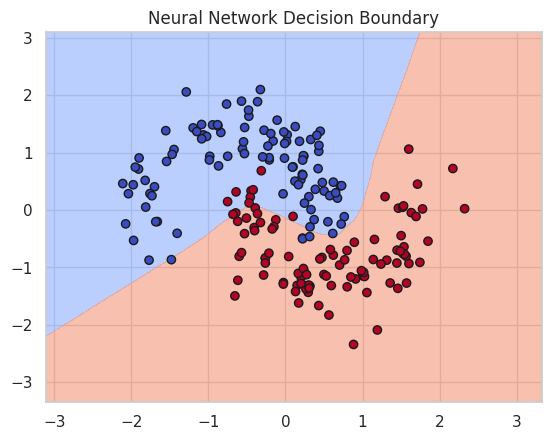

In [9]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.6, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    plt.title("Neural Network Decision Boundary")
    plt.show()

plot_decision_boundary(model, X_test, y_test)

### **Summary**

- Deep learning uses multi-layer networks to learn complex patterns
- We built a basic neural net using Keras
- It learned non-linear decision boundaries on toy data

**Next:** Dive into real-world image data and convolutional networks in `cnn.ipynb`
